# Global Housing Vulnerability: Analyzing Urban Slums & Inadequate Housing Patterns

**Understanding Urban Housing Challenges**: Housing quality and access represent foundational elements of human development and social equity in urban environments. This analysis examines global patterns of urban slums and inadequate housing prevalence across regions and time periods, providing critical intelligence on sustainable development progress, urbanization quality, and the human impact of economic development strategies.

**Analytical Framework for Housing Vulnerability**: Through multi-dimensional visualization and comparative regional analysis, we investigate both the magnitude and trajectory of urban housing challenges. This approach reveals which regions face persistent structural issues versus those achieving sustainable improvements, identifying policy successes, implementation gaps, and priority intervention areas. The analysis provides essential context for urban planning, development funding allocation, and strategic policy design to address one of urbanization's most critical social challenges.

In [9]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the datasets
gdp_metropol = pd.read_excel('../data/gdp_metropol.xls')
gini_disposable = pd.read_excel('../data/gini_disposable_income.xls')
urban_popu = pd.read_excel('../data/urban_living_1.xlsx')
urban_greenspace = pd.read_excel('../data/urban_living_greenspace_2.xlsx')

# only run this with the above cells, other issues present. 
# manage dataset 1
# set row 1 to column names
gdp_metropol.columns = gdp_metropol.iloc[0]
gdp_metropol = gdp_metropol[1:]

# remove last two rows
gdp_metropol = gdp_metropol[:-2]

# manage dataset 2
# set row 1 to column names
gini_disposable.columns = gini_disposable.iloc[0]
gini_disposable = gini_disposable[1:]

# remove last three rows
gini_disposable = gini_disposable[:-3]

# melt data so years are rows not columns 
gini_disposable = gini_disposable.melt(id_vars=["Country", "City/region"], var_name="Year", value_name="Gini")

# convert ".." to proper nulls, then coerce to numeric
gini_disposable = gini_disposable[gini_disposable["Gini"] != ".."]
gini_disposable["Gini"] = pd.to_numeric(gini_disposable["Gini"], errors="coerce")

# manage dataset3
# remove unwanted columns by name
urban_popu = urban_popu.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Name',
    'Data Units',
    'Data Source',
    'Footnote'
])

# manage dataset
# remove unwanted columns by name
urban_greenspace = urban_greenspace.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Code',
    'City Code',
    'Data Units',
    'Data Source',
    'FootNote'
])

# rename long columns
urban_popu = urban_popu.rename(columns={
    'Proportion of urban population living in slums or informal settlements (%) (a)': 'Urban Slum %',
    'Proportion of urban population living in inadequate housing (%) (b)': 'Inadequate Housing %',
    'Country or Territory Name.1': 'Country',
    'Data Reference Year': 'Year',
})

urban_greenspace = urban_greenspace.rename(columns={
    'Average share of the built-up area of cities that is open space for public use for all (%) [a]': 'Open_Space_Share',
    'Average share of urban population with convenient access to open public spaces (%) [b]': 'Urban_Public_Access'
})

In [10]:
x = urban_popu
display(x.sample(6))
x.info()

,Country,SDG Region,SDG Sub-Region,Urban Slum %,Inadequate Housing %,Year
72,Andorra,Northern America and Europe,Southern Europe,0.000000,NaN,2015
596,Canada,Northern America and Europe,Northern America,0.250000,NaN,2001
1168,Finland,Northern America and Europe,Northern Europe,0.000000,4.7,2008
2603,North Macedonia,Northern America and Europe,Southern Europe,0.900000,NaN,2009
2309,Mongolia,Eastern Asia and South-Eastern Asia,Eastern Asia,41.713939,NaN,2008
3073,Serbia,Northern America and Europe,Southern Europe,0.450000,31.7,2014


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               4033 non-null   object 
 1   SDG Region            4424 non-null   object 
 2   SDG Sub-Region        4424 non-null   object 
 3   Urban Slum %          4353 non-null   float64
 4   Inadequate Housing %  640 non-null    float64
 5   Year                  4424 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 207.5+ KB


## Data Foundations: Urban Housing Quality Metrics & Measurement Framework

**Definitional Distinctions & Measurement Methodology**: The urban living dataset provides two critical metrics with important conceptual distinctions: "Urban Slum %" captures populations living in settlements lacking basic services, secure tenure, and durable housing, while "Inadequate Housing %" measures populations in formal but substandard housing units. Together, these complementary metrics provide a comprehensive view of housing vulnerability across both informal settlements and inadequate formal housing stock.

**Geographic & Temporal Coverage**: The dataset structures observations across SDG regions with multi-year measurements, enabling both cross-regional comparisons and longitudinal trend analysis. This dual capability supports identification of regions with persistent challenges versus those making consistent progress, while also revealing global trajectories in housing quality improvement. The standardized regional classifications align with Sustainable Development Goals monitoring frameworks, facilitating integration with broader development indicator analysis.

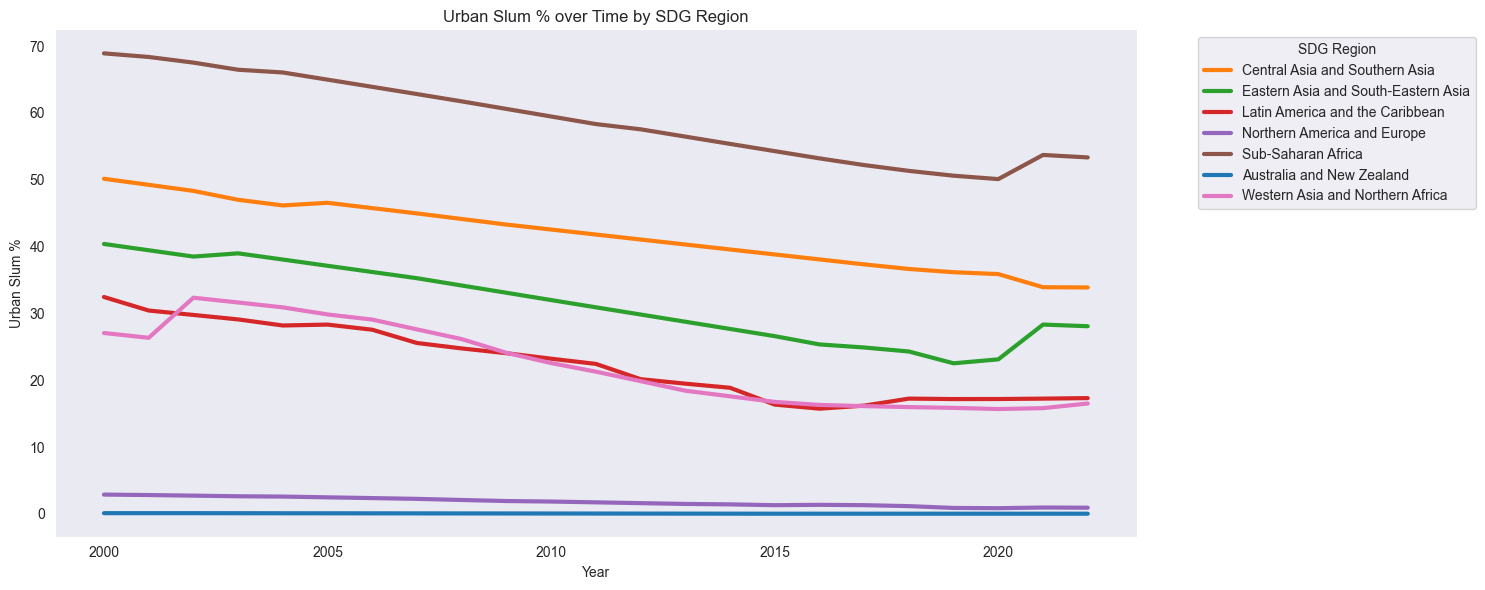

In [36]:
# refresh data for clean visualising. 
df = urban_popu.copy()

include_list = [
    'Australia and New Zealand',
    'Central Asia and Southern Asia',
    'Eastern Asia and South-Eastern Asia',
    'Western Asia and Northern Africa',
    'Sub-Saharan Africa',
    'Latin America and the Caribbean',
    'Northern America and Europe',
]
# filter the dataframe
df = df[df['SDG Region'].isin(include_list)]

# fill na with 0 (this is likely what it means for inadequate housing)
df['Inadequate Housing %'] = df['Inadequate Housing %'].fillna(0)

# group and calculate mean
grouped = df.groupby(['SDG Region', 'Year'])['Urban Slum %'].mean().reset_index()
last_values = {}

# plot it
sns.set_style("dark")
plt.figure(figsize=(15, 6))
for subregion in grouped['SDG Region'].unique():
    sub_df = grouped[grouped['SDG Region'] == subregion]
    plt.plot(sub_df['Year'], sub_df['Urban Slum %'], label=subregion, linewidth=3)

    # store last available vaule
    last_values[subregion] = sub_df.loc[sub_df['Year'].idxmax(), 'Urban Slum %']

# Sort legend by last value (descending)
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda i: last_values[labels[i]], reverse=True)
plt.legend([handles[i] for i in order], [labels[i] for i in order], title="SDG Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Urban Slum % over Time by SDG Region')
plt.xlabel('Year')
plt.ylabel('Urban Slum %')
sns.despine()
plt.tight_layout()
plt.show()

## Regional Slum Prevalence Dynamics: Longitudinal Analysis of Informal Settlement Patterns

**Divergent Regional Trajectories**: The regional analysis of urban slum prevalence reveals dramatically different trajectories across global regions, with Sub-Saharan Africa maintaining the highest levels despite some improvement, while regions like Northern America and Europe show consistently minimal slum prevalence. The visualization highlights both absolute levels and rate of change, identifying regions making significant progress versus those facing persistent or growing challenges.

**Policy Effectiveness Indicators**: The long-term trajectories provide critical evidence of policy effectiveness and implementation capacity across regions. Declining trends in regions like Eastern Asia and South-Eastern Asia demonstrate successful large-scale urban upgrading and housing policies, while plateauing trends in other regions may indicate either policy implementation failures or overwhelming rates of urban migration that outpace formal housing development capacity. This comparative framework provides essential context for understanding where intervention models have succeeded and where new approaches may be required.

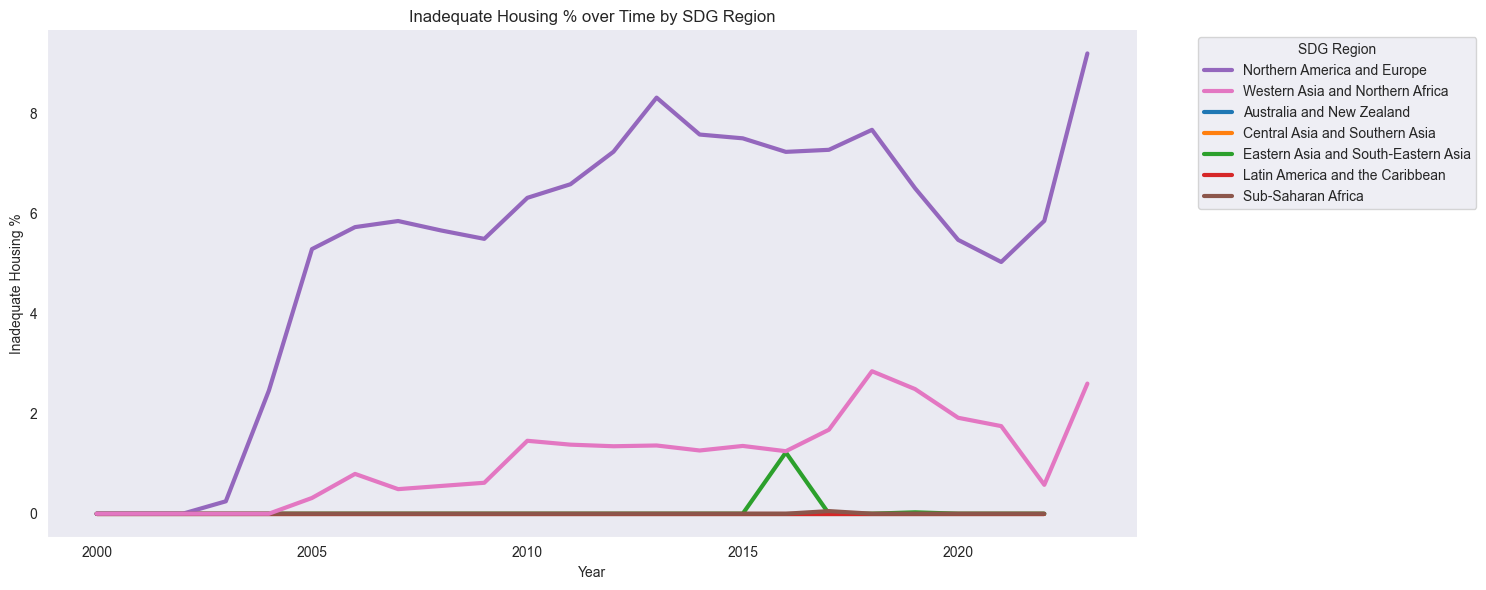

In [39]:
# group and calculate mean
grouped = df.groupby(['SDG Region', 'Year'])['Inadequate Housing %'].mean().reset_index()
last_values = {}

# plot it
sns.set_style("dark")
plt.figure(figsize=(15, 6))
for subregion in grouped['SDG Region'].unique():
    sub_df = grouped[grouped['SDG Region'] == subregion]
    plt.plot(sub_df['Year'], sub_df['Inadequate Housing %'], label=subregion, linewidth=3)

    # store last available vaule
    last_values[subregion] = sub_df.loc[sub_df['Year'].idxmax(), 'Inadequate Housing %']

# Sort legend by last value (descending)
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda i: last_values[labels[i]], reverse=True)
plt.legend([handles[i] for i in order], [labels[i] for i in order], title="SDG Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Inadequate Housing % over Time by SDG Region')
plt.xlabel('Year')
plt.ylabel('Inadequate Housing %')
sns.despine()
plt.tight_layout()
plt.show()

## Inadequate Housing Trends: Formal Sector Housing Quality Challenges

**Complementary Housing Vulnerability Metric**: The analysis of inadequate housing prevalence provides a critical complementary perspective to slum analysis, capturing housing deficiencies within formal urban areas. This metric reveals quality challenges in established housing stock rather than informal settlements, highlighting regions where formal housing development has occurred but with significant quality deficits in construction standards, service provision, or habitability.

**Divergent Patterns from Slum Indicators**: The regional patterns for inadequate housing often differ substantially from slum prevalence, with some regions showing low slum percentages but high inadequate housing rates. This divergence reveals the multi-dimensional nature of housing vulnerability and exposes potential policy blind spots where formal housing expansion has occurred without sufficient quality standards or regulatory enforcement. Understanding these patterns is essential for comprehensive housing policy that addresses both informal settlement challenges and quality deficits in formal housing development.

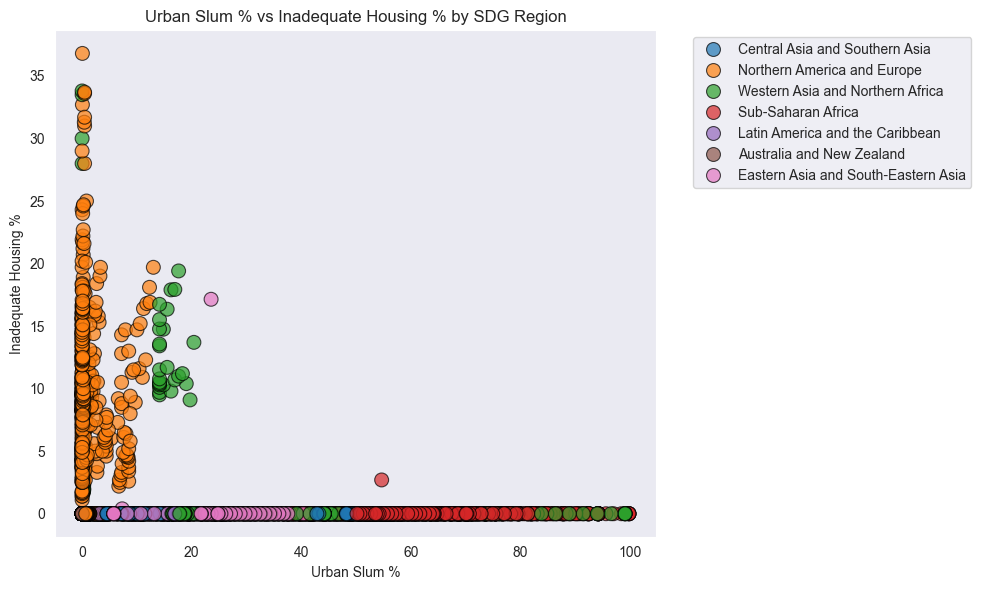

In [45]:
# Start fresh from your filtered df
scatter_df = df.copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=scatter_df,
    x='Urban Slum %',
    y='Inadequate Housing %',
    hue='SDG Region',
    s=100,
    edgecolor='black',
    alpha=0.7
)

plt.title('Urban Slum % vs Inadequate Housing % by SDG Region')
plt.xlabel('Urban Slum %')
plt.ylabel('Inadequate Housing %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Dual Vulnerability Analysis: Relationship Between Slums and Inadequate Housing

**Correlation Pattern Assessment**: The scatter plot analysis reveals the complex relationship between urban slum prevalence and inadequate housing rates across regions. This visualization exposes whether regions face dual challenges (high values on both metrics) or show trade-offs where formal housing expansion has reduced slums but potentially introduced quality challenges in rapidly developed formal housing stock.

**Regional Housing Vulnerability Typology**: The distribution of observations creates a typology of regional housing vulnerability patterns: regions in the lower-left quadrant demonstrate successful housing systems addressing both informal settlements and quality standards; those in the upper-left show successful formalization but quality challenges; those in the lower-right indicate persistent informality despite quality construction; and those in the upper-right face comprehensive housing system failures across both dimensions. This framework provides essential strategic intelligence for tailoring housing interventions to the specific pattern of challenges faced in different global regions.

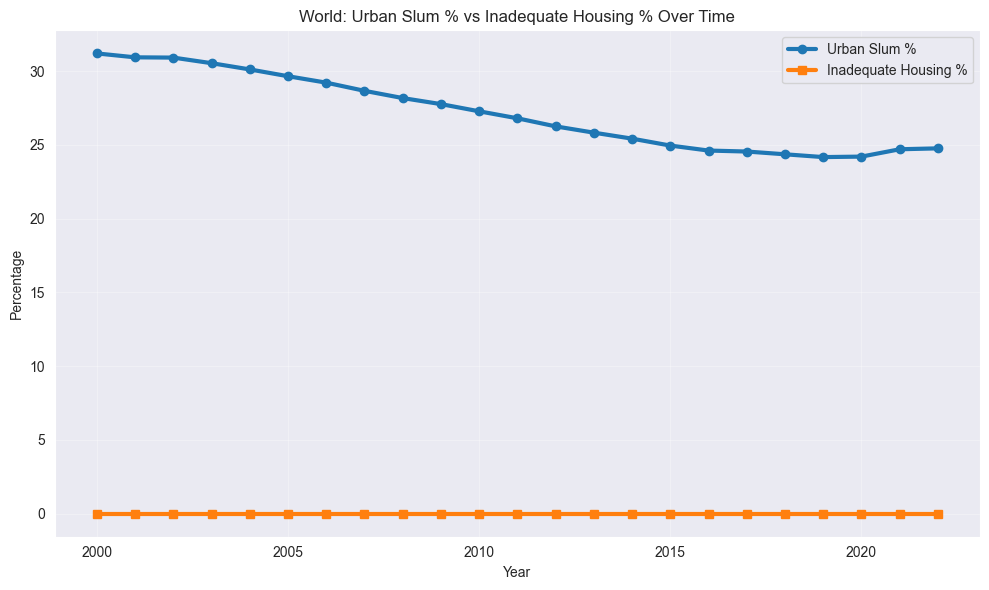

In [51]:
# Filter for World
world_df = urban_popu[urban_popu['SDG Region'] == 'World'].copy()

# Fill NaN for Inadequate Housing %
world_df['Inadequate Housing %'] = world_df['Inadequate Housing %'].fillna(0)

# Sort by Year
world_df = world_df.sort_values('Year')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(world_df['Year'], world_df['Urban Slum %'], marker='o', linewidth=3, label='Urban Slum %')
plt.plot(world_df['Year'], world_df['Inadequate Housing %'], marker='s', linewidth=3, label='Inadequate Housing %')

plt.title('World: Urban Slum % vs Inadequate Housing % Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Global Housing Trajectory: World-Level Trends in Urban Vulnerability

**Aggregate Global Progress Assessment**: The world-level analysis provides a macro view of global progress in addressing urban housing vulnerability, revealing whether collective international efforts through SDGs and national housing policies are yielding meaningful results at the global scale. This aggregate perspective transcends regional variations to assess whether humanity as a whole is making progress on this fundamental aspect of urban development and human dignity.

**Dual Metric Convergence Analysis**: The parallel tracking of both slum prevalence and inadequate housing percentages at the global level reveals whether improvements in formal housing access (slum reduction) are being matched by improvements in housing quality standards. Any divergence between these metrics would indicate potential policy imbalances where formalization is occurring without sufficient attention to quality standards, potentially creating new forms of urban vulnerability despite statistical improvements in slum reduction. This comprehensive view is essential for guiding global policy frameworks and investment priorities in urban development.

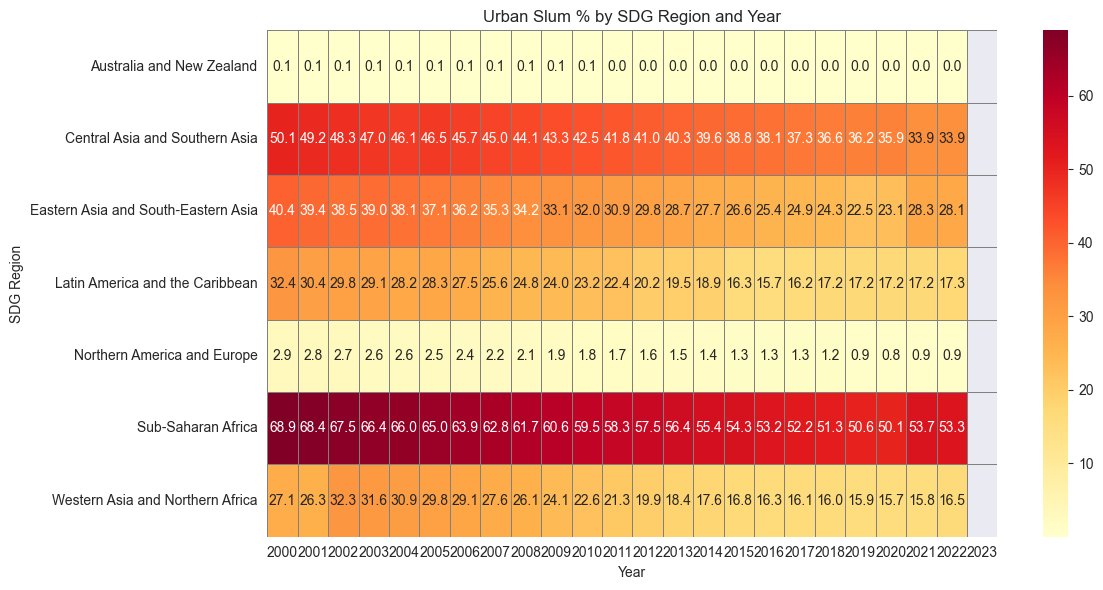

In [44]:
# Pivot the grouped data
heatmap_df = (
    df.groupby(['SDG Region', 'Year'])['Urban Slum %']
      .mean()
      .reset_index()
      .pivot(index='SDG Region', columns='Year', values='Urban Slum %')
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_df,
    annot=True,           # show numbers
    fmt=".1f",             # one decimal place
    cmap="YlOrRd",         # color palette
    linewidths=0.5,
    linecolor='grey'
)

plt.title('Urban Slum % by SDG Region and Year')
plt.xlabel('Year')
plt.ylabel('SDG Region')
plt.tight_layout()
plt.show()
